In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("C://Users//manna//OneDrive//Desktop//Coding Club Recruitment//ML Task//Dataset.csv")
df = pd.DataFrame(data)

In [4]:
df.head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,no


Level 1

In [5]:
anonymized_features = ['Feature_1', 'Feature_2', 'Feature_3']

for feature in anonymized_features:
    unique_vals = df[feature].unique()
    print(f"Unique values in {feature}: {sorted(unique_vals)}")

Unique values in Feature_1: [15.0, 16.0, 17.0, 18.0, nan, 19.0, 20.0, 21.0, 22.0]
Unique values in Feature_2: [2.0, nan, 1.0, 3.0, 4.0]
Unique values in Feature_3: [1.0, 2.0, 3.0, 4.0, nan, 5.0]


Finding the all possible values for each of the 3 Features can give us a better hint about what exactly do they measure

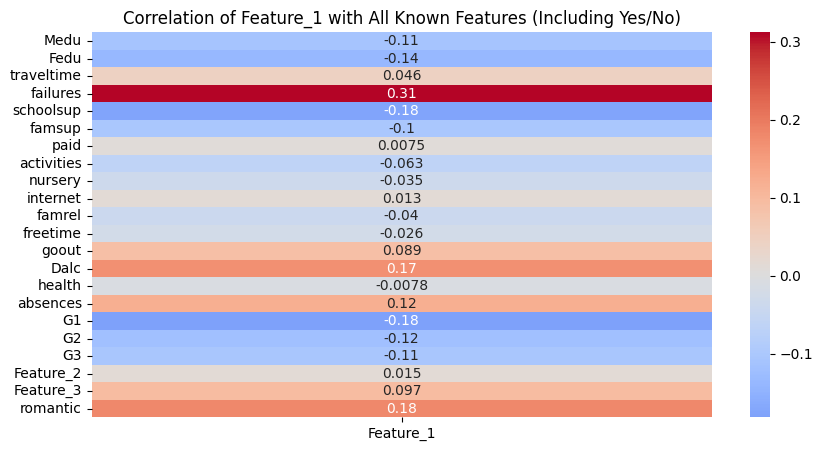

In [6]:
df_corr = df.copy()
yes_no_cols = [col for col in df_corr.columns if df_corr[col].nunique() == 2 and set(df_corr[col].unique()) <= {'yes', 'no'}]

for col in yes_no_cols:
    df_corr[col] = df_corr[col].map({'yes': 1, 'no': 0})
anonymized_feature = 'Feature_1'  
numeric_cols = df_corr.select_dtypes(include='number').columns.tolist()
numeric_cols.remove(anonymized_feature)

corr_df = df_corr[[anonymized_feature] + numeric_cols]
correlations = corr_df.corr()[[anonymized_feature]].drop(index=anonymized_feature)
plt.figure(figsize=(10, 5))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.title(f'Correlation of {anonymized_feature} with All Known Features (Including Yes/No)')
plt.show()

From the correlation map for Feature_1 we can see it is strongly correlated with Failures and also with Dalc,absences and inversely related with grades(G1,G2,G3) and Fedu. So checking for scatter plots with those features. 

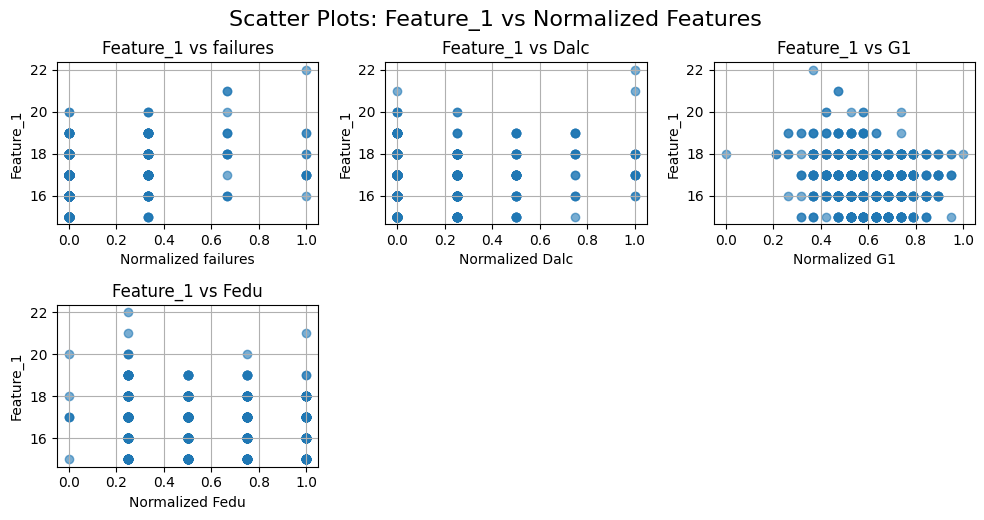

In [7]:
from sklearn.preprocessing import MinMaxScaler
features_to_plot = ['failures','Dalc','G1','Fedu']
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[features_to_plot] = scaler.fit_transform(df[features_to_plot])

plt.figure(figsize=(10, 5))

for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i+1) 
    plt.scatter(df_normalized[feature], df['Feature_1'], alpha=0.6)
    plt.xlabel(f'Normalized {feature}')
    plt.ylabel('Feature_1')
    plt.title(f'Feature_1 vs {feature}')
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Scatter Plots: Feature_1 vs Normalized Features", fontsize=16, y=1.03)
plt.show()


I feel Feaure_1 is age, the main reason is the values are 15-22 which are very common among high school to highersecondary school(15-19) and in some cases college student(20-22). Again as age increases tendencay of Dalc(alcohol consumption),relationship increases. Again with higher classes acads become tough so failure rate also increases and grades fall. So Feature_1 might be Age

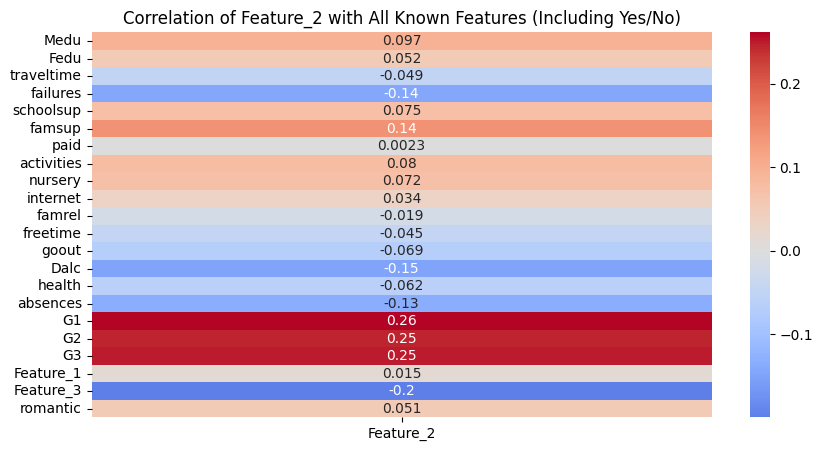

In [8]:
df_corr = df.copy()
yes_no_cols = [col for col in df_corr.columns if df_corr[col].nunique() == 2 and set(df_corr[col].unique()) <= {'yes', 'no'}]

for col in yes_no_cols:
    df_corr[col] = df_corr[col].map({'yes': 1, 'no': 0})
anonymized_feature = 'Feature_2'  
numeric_cols = df_corr.select_dtypes(include='number').columns.tolist()
numeric_cols.remove(anonymized_feature)

corr_df = df_corr[[anonymized_feature] + numeric_cols]
correlations = corr_df.corr()[[anonymized_feature]].drop(index=anonymized_feature)
plt.figure(figsize=(10, 5))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.title(f'Correlation of {anonymized_feature} with All Known Features (Including Yes/No)')
plt.show()

From correlation map of Feature_2 we see it is strongly related with Grades(G1,G2,G3) while inversely related with Dalc,Failures,Absences. So checking scatter plot with them.

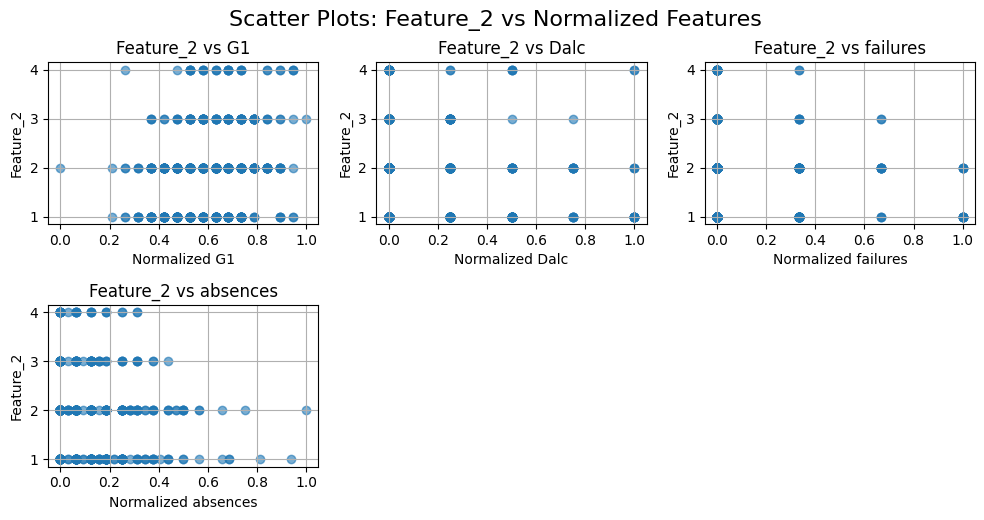

In [9]:
features_to_plot = ['G1','Dalc','failures','absences']

scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[features_to_plot] = scaler.fit_transform(df[features_to_plot])

plt.figure(figsize=(10, 5))

for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i+1)  
    plt.scatter(df_normalized[feature], df['Feature_2'], alpha=0.6)
    plt.xlabel(f'Normalized {feature}')
    plt.ylabel('Feature_2')
    plt.title(f'Feature_2 vs {feature}')
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Scatter Plots: Feature_2 vs Normalized Features", fontsize=16, y=1.03)
plt.show()


From the Correlation map it is evident Feature_2 is very much related with Grades. Also from ScatterPlot Feature 2 is directly related to Grade and inversely to absences and failures. So Feature_2 may be Class_Rank or Class Performance rated 1 to 5.

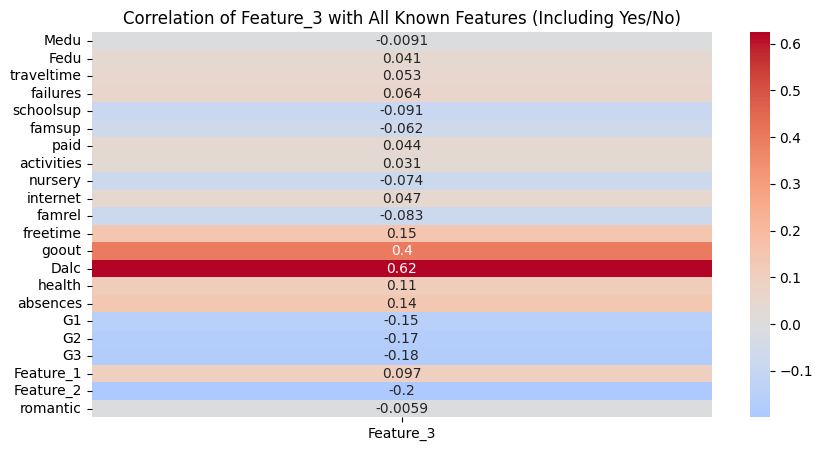

In [10]:
df_corr = df.copy()
yes_no_cols = [col for col in df_corr.columns if df_corr[col].nunique() == 2 and set(df_corr[col].unique()) <= {'yes', 'no'}]

for col in yes_no_cols:
    df_corr[col] = df_corr[col].map({'yes': 1, 'no': 0})
anonymized_feature = 'Feature_3'  
numeric_cols = df_corr.select_dtypes(include='number').columns.tolist()
numeric_cols.remove(anonymized_feature)

corr_df = df_corr[[anonymized_feature] + numeric_cols]
correlations = corr_df.corr()[[anonymized_feature]].drop(index=anonymized_feature)
plt.figure(figsize=(10, 5))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.title(f'Correlation of {anonymized_feature} with All Known Features (Including Yes/No)')
plt.show()

From Correlation map of Feature_3 we can see it is strongly correlated with Dalc,Goout,freetime and inversely related to grades(G1,G2,G3). So checking scatter plot with them.

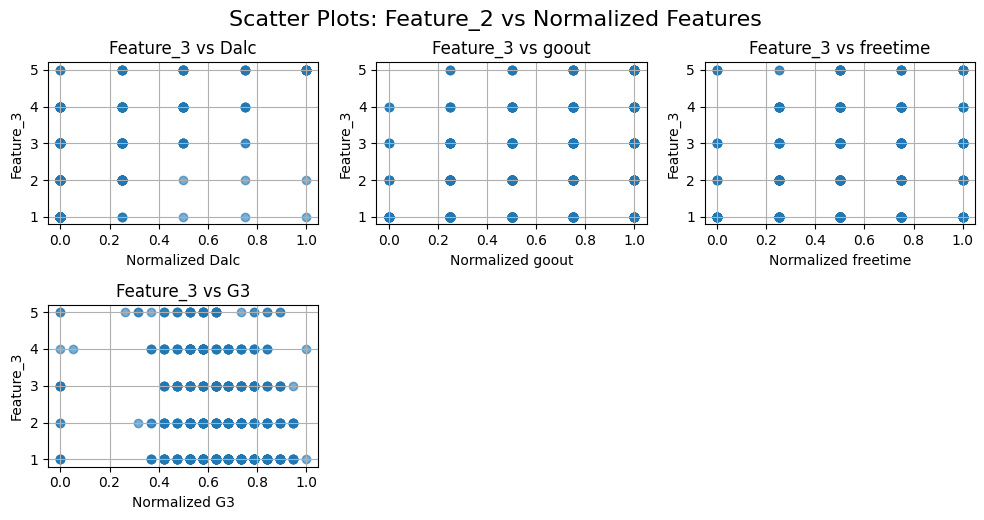

In [11]:
features_to_plot = ['Dalc','goout','freetime','G3']

scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[features_to_plot] = scaler.fit_transform(df[features_to_plot])

plt.figure(figsize=(10, 5))

for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i+1) 
    plt.scatter(df_normalized[feature], df['Feature_3'], alpha=0.6)
    plt.xlabel(f'Normalized {feature}')
    plt.ylabel('Feature_3')
    plt.title(f'Feature_3 vs {feature}')
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Scatter Plots: Feature_2 vs Normalized Features", fontsize=16, y=1.03)
plt.show()

I feel Feature_3 is Monthly Expense or Pocket Money of Student rated 1 to 5 because as Pocket Money increase, the tendency of Alcohol consuption will increase and we see Dalc has very high correlation with it in correlation map. Again, Goout & Freetime also increase with Feature_3 because they get more tendency to bunk school and go for entertainment with more pocket money rated 1 to 5.

Level 2

In [12]:
nan_counts = df.isna().sum()
cols_with_nan = nan_counts[nan_counts > 0]
nan_summary = pd.DataFrame({
    'NaN Count': cols_with_nan,
    'Data Type': df[cols_with_nan.index].dtypes
})
nan_summary = nan_summary.reset_index().rename(columns={'index': 'Column'})

print("Columns with Missing Values:")
print(nan_summary)


Columns with Missing Values:
       Column  NaN Count Data Type
0     famsize         50    object
1        Fedu         73   float64
2  traveltime         73   float64
3      higher         76    object
4    freetime         45   float64
5    absences         69   float64
6          G2         35   float64
7   Feature_1         38   float64
8   Feature_2         46   float64
9   Feature_3         39   float64


In [13]:
df.shape

(649, 33)

It seems that out of 33 columns 10 have missing values. 

In [14]:
skew_values = df.select_dtypes(include='number').skew()

print(" Highly Skewed Columns:")
print(skew_values[abs(skew_values) > 1])

 Highly Skewed Columns:
traveltime    1.226471
failures      3.092699
famrel       -1.105934
Dalc          2.141913
absences      2.015473
dtype: float64


Checking how skewed is the data.

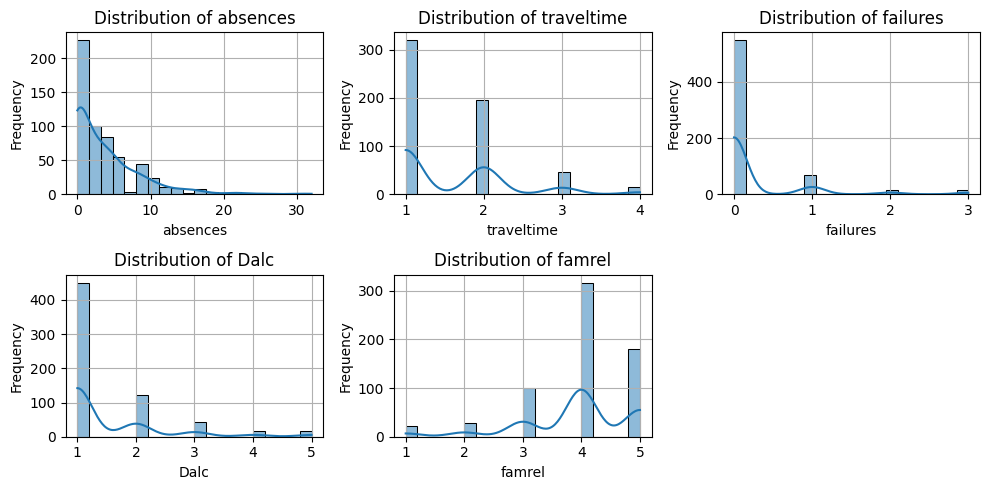

In [15]:
columns = ['absences', 'traveltime', 'failures', 'Dalc', 'famrel']

# Plot
plt.figure(figsize=(10, 5))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [16]:
cols_to_transform = ['absences', 'failures', 'Dalc', 'traveltime']
epsilon = 1e-6

for col in cols_to_transform:
    df[col] = np.log1p(df[col] + epsilon)

To reduce the skewness of data using log for Right skewed columns and Box cox for the rest of the skewed columns.

In [17]:
from scipy.stats import boxcox
df['famrel_boxcox'], famrel_lambda = boxcox(df['famrel'])

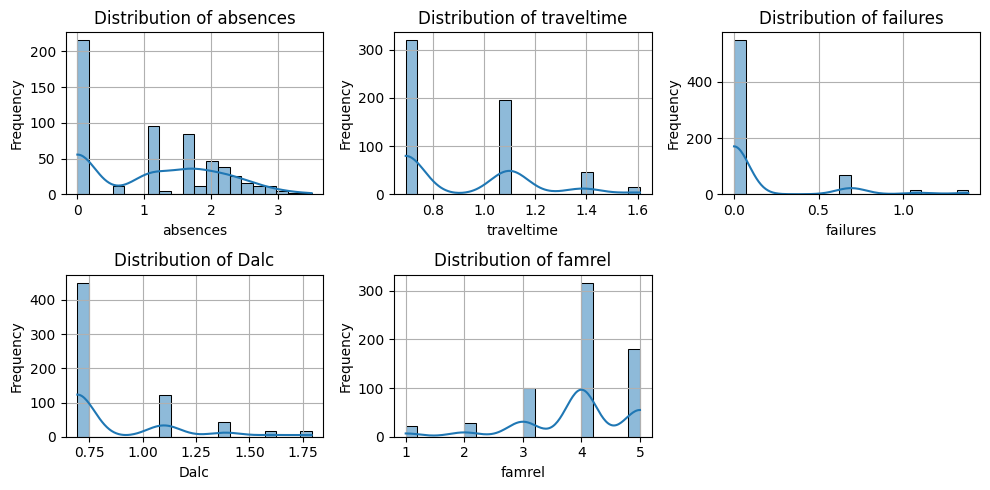

In [18]:
columns = ['absences', 'traveltime', 'failures', 'Dalc', 'famrel']

# Plot
plt.figure(figsize=(10, 5))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)

plt.tight_layout()
plt.show()

Fedu,traveltime,absences and Feature_2 have quite large number of missing values. First 3 have more than 10 % missing. So they should not be filled with same value(like mean or median). That may affect overall data. So Iterative Imputer is applied by KNN(K Nearest Neighbour) Imputer.This will maintain good accuracy

KNN Imputer generally has high accuracy while used later for various Machine Learning models. So it is chosen

In [19]:
from sklearn.impute import KNNImputer

cols_to_impute = ['Fedu', 'traveltime', 'freetime', 'absences', 'Feature_2']
imputer = KNNImputer(n_neighbors=5)  
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])


Feature_1,Feature_3,G2,freetime have close to 5 % missing value. So if we fill by simple mean, then they won't be much affected. So they are filled by mean.

In [20]:
from sklearn.impute import SimpleImputer
columns_to_impute = ['Feature_1', 'Feature_3', 'G2']
imputer = SimpleImputer(strategy='mean')
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])


Both the yes/no type columns famsize and higher have about 10 % missing values. So I used Random ForestClassifier by Iterative Imputer to fill missing places in order to prevent reduction of accuracy.

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier

df_binary = df.copy()

binary_mapping = {
    'famsize': {'LE3': 0, 'GT3': 1},
    'higher': {'no': 0, 'yes': 1}
}

cols_to_impute = ['famsize', 'higher']

for col in cols_to_impute:
    df_binary[col] = df_binary[col].map(binary_mapping[col])

imputer = IterativeImputer(estimator=RandomForestClassifier(), random_state=0, max_iter=20)
df_binary[cols_to_impute] = imputer.fit_transform(df_binary[cols_to_impute])

inverse_mapping = {
    'famsize': {0: 'LE3', 1: 'GT3'},
    'higher': {0: 'no', 1: 'yes'}
}

for col in cols_to_impute:
    df_binary[col] = df_binary[col].round().astype(int).map(inverse_mapping[col])

df[cols_to_impute] = df_binary[cols_to_impute]


In [22]:
nan_counts = df.isna().sum()
cols_with_nan = nan_counts[nan_counts > 0]
nan_summary = pd.DataFrame({
    'NaN Count': cols_with_nan,
    'Data Type': df[cols_with_nan.index].dtypes
})
nan_summary = nan_summary.reset_index().rename(columns={'index': 'Column'})

print("Columns with Missing Values:")
print(nan_summary)

Columns with Missing Values:
Empty DataFrame
Columns: [Column, NaN Count, Data Type]
Index: []


Now none of the columns have missing values.So we have succesfully handled missing values

Level 3

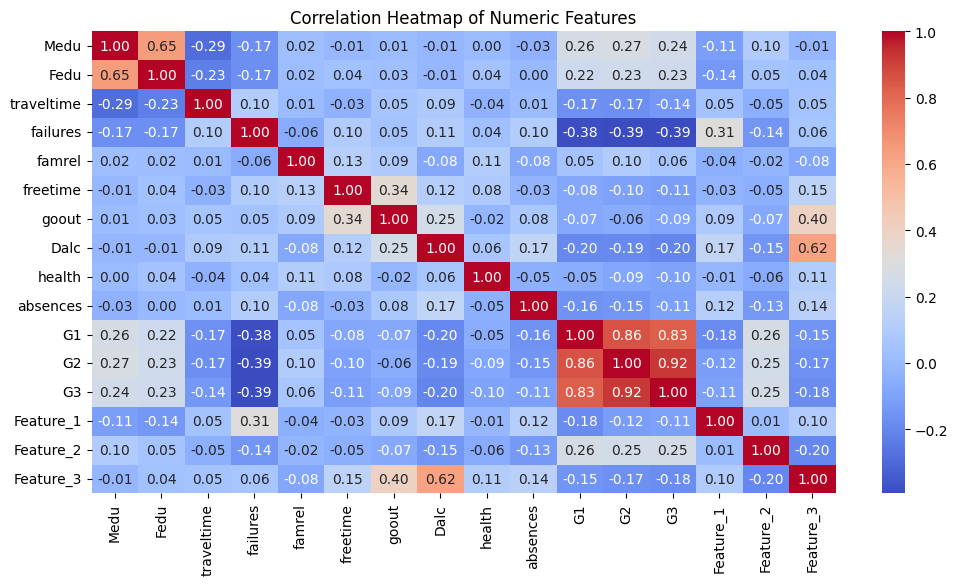

In [23]:
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

We can ask question regarding how the Grades are inter related and how can we judge the academic performance of the students.

From this Correlation Heatmap, the very obvious and intuitive conclusions are :
the grades in first,second and final terms are very interrelated, this implies students show a trend of consistency in their academic performance. Similarly G1,G2,G3 are inversely related to failures, because those who had earlier history of failures are supposed to be below average students and perform poor in term exams.

Again those who have habit of Alcohol consumption, have interrelation with Feature_3.(An observation)

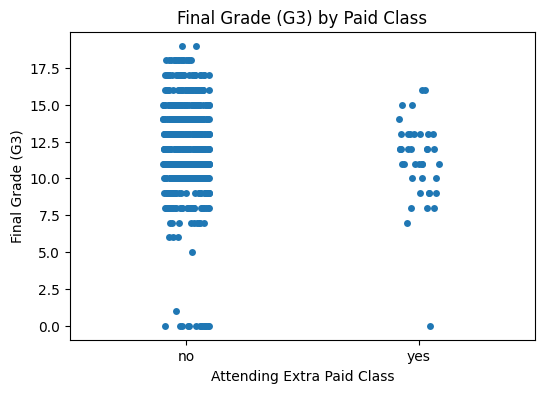

In [24]:
plt.figure(figsize=(6, 4))
sns.stripplot(x='paid', y='G3', data=df, jitter=True)
plt.title('Final Grade (G3) by Paid Class')
plt.xlabel('Attending Extra Paid Class')
plt.ylabel('Final Grade (G3)')
plt.show()

We can ask question, how taking extra paid class is affecting the grades of students.

It seems that majority students don't have extra paid classes. But those who have extra class, tend to have average grades. So they don't get very poor grades due to guidance from extra class. But toppers mostly don't have extra classes because may be they increase their perfection by self study rather than extra classes.

Now our main goal is to relate Romantic relationship with various features, so we can ask it's correlation with other features.

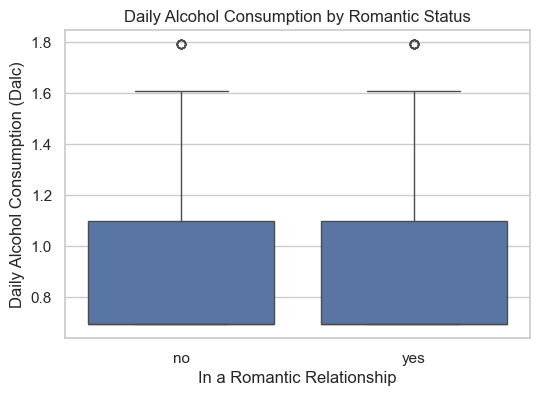

In [25]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.boxplot(x='romantic', y='Dalc', data=df)
plt.title('Daily Alcohol Consumption by Romantic Status')
plt.xlabel('In a Romantic Relationship')
plt.ylabel('Daily Alcohol Consumption (Dalc)')
plt.show()

So Daily Alcohol consuption doesn't seem to be related at all with Romantic relationship because both the boxplots are exactly similar

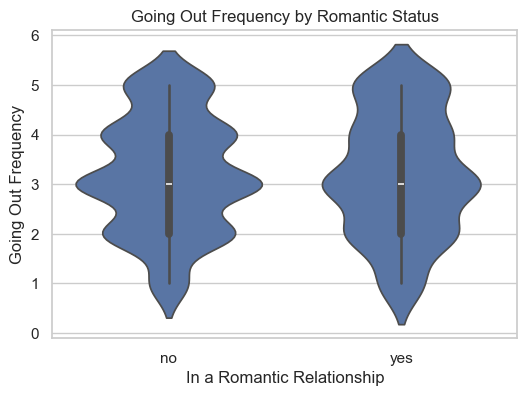

In [26]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='romantic', y='goout', data=df, inner='box')  
plt.title('Going Out Frequency by Romantic Status')
plt.xlabel('In a Romantic Relationship')
plt.ylabel('Going Out Frequency')
plt.show()

Most students irrespective of being in relationship go out in level 2 to 4. So it seems relationship doesn't have much relation with going out. But those who are in level close to 6 are more likely to be in relationship(may be due to frequent dating)

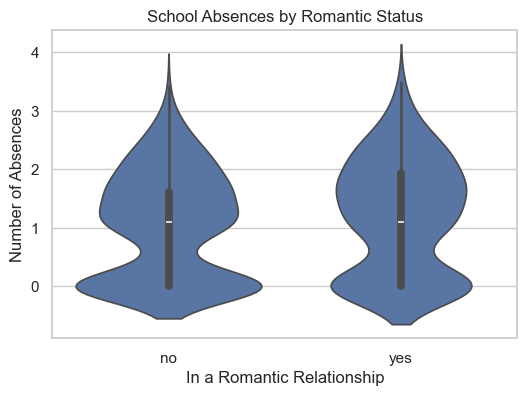

In [27]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='romantic', y='absences', data=df, inner='box')
plt.title('School Absences by Romantic Status')
plt.xlabel('In a Romantic Relationship')
plt.ylabel('Number of Absences')
plt.show()

It seems that both students with and without relationship have school absences. But we see those who are not in relationship, have wider base...So they tend to be less absent in school. While those in relationship have higher top of graph, indicating they have higher tendency to bunk school. 

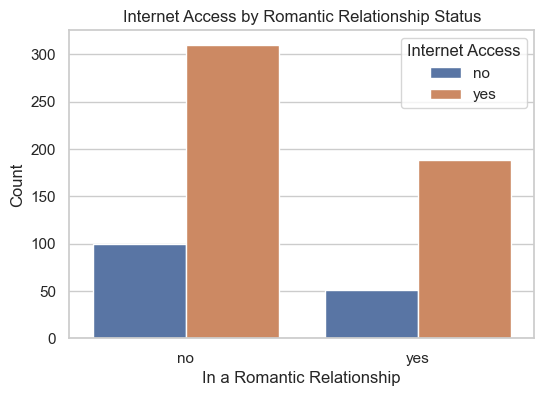

In [28]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x='romantic', hue='internet', data=df)
plt.title('Internet Access by Romantic Relationship Status')
plt.xlabel('In a Romantic Relationship')
plt.ylabel('Count')
plt.legend(title='Internet Access')
plt.show()

Internet Access at Home is very common in both conditions of Relationship. But it seems that among those who don't have internet access, more students are not in relationship.

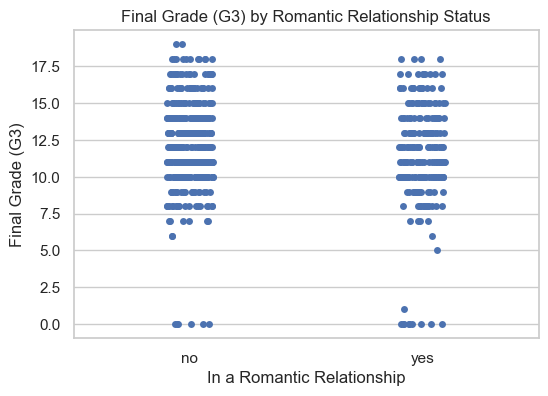

In [29]:
plt.figure(figsize=(6, 4))
sns.stripplot(x='romantic', y='G3', data=df, jitter=True)
plt.title('Final Grade (G3) by Romantic Relationship Status')
plt.xlabel('In a Romantic Relationship')
plt.ylabel('Final Grade (G3)')
plt.show()

Although both type of students based on relationship have wide range of grades, it seems that the students with the highest grades are not in relationship. Also in between grade 0 to 7.5 there are more students who are in relationship. So Relationship even if not much but slightly can affect relationship.

Level 4

Label Encoding those features which are having Yes/No type value or objecttypes like Famsize,School, help to make them more useful for various Machine Learning Models

In [30]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
columns_to_encode = ['school','sex', 'address', 'famsize', 'Pstatus','Mjob', 'Fjob', 'reason', 'guardian','schoolsup',
                     'famsup','paid','activities','nursery','higher','internet','romantic']

label_encoders = {}  

for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le          



I had already tried to use ML models without PCA(Principal Component Analysis) but got too low accuracy. So tried to icrease accuracy with hthe help of PCA. There are very large number of columns, so I feel PCA may help to reduce dimension and thereby give better results.

In [31]:
!pip install xgboost

In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


X = df.drop(columns=['romantic'])
y = df['romantic']

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=130, stratify=y)

xgb_model = XGBClassifier(
    use_label_encoder=False,  
    eval_metric='logloss',   
    random_state=42
)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(" Classification Report:")
print(classification_report(y_test, y_pred))

print(" Accuracy:", accuracy_score(y_test, y_pred))


 Confusion Matrix:
[[70 12]
 [32 16]]
 Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        82
           1       0.57      0.33      0.42        48

    accuracy                           0.66       130
   macro avg       0.63      0.59      0.59       130
weighted avg       0.64      0.66      0.64       130

 Accuracy: 0.6615384615384615


c:\Users\manna\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:35:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df.drop(columns=['romantic']) 
y = df['romantic']  

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(" Classification Report:")
print(classification_report(y_test, y_pred))

print(" Accuracy:", accuracy_score(y_test, y_pred))

 Confusion Matrix:
[[71 10]
 [41  8]]
 Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.88      0.74        81
           1       0.44      0.16      0.24        49

    accuracy                           0.61       130
   macro avg       0.54      0.52      0.49       130
weighted avg       0.56      0.61      0.55       130

 Accuracy: 0.6076923076923076


In [42]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['romantic'])  
y = df['romantic']  
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(" Classification Report:")
print(classification_report(y_test, y_pred))

print(" Accuracy:", accuracy_score(y_test, y_pred))


 Confusion Matrix:
[[71 10]
 [39 10]]
 Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.88      0.74        81
           1       0.50      0.20      0.29        49

    accuracy                           0.62       130
   macro avg       0.57      0.54      0.52       130
weighted avg       0.59      0.62      0.57       130

 Accuracy: 0.6230769230769231


In [51]:
from sklearn.svm import SVC

X = df.drop(columns=['romantic'])
y = df['romantic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='rbf', random_state=42,probability=True)  
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(" Classification Report:")
print(classification_report(y_test, y_pred))

print(" Accuracy:", accuracy_score(y_test, y_pred))

 Confusion Matrix:
[[81  0]
 [49  0]]
 Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        81
           1       0.00      0.00      0.00        49

    accuracy                           0.62       130
   macro avg       0.31      0.50      0.38       130
weighted avg       0.39      0.62      0.48       130

 Accuracy: 0.6230769230769231


c:\Users\manna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\manna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\manna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


It seems that the XGBoost is comparatively the best classifier for this case, and Decision treee also work scomparatively better than Logistic Regression.Again Decision Tree and SVM(Support Vector Machine) seem to perform very similar. The data being very complex with large variation of data points which are not follwoing any specific pattern is a prime reason for this observation.

c:\Users\manna\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:35:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


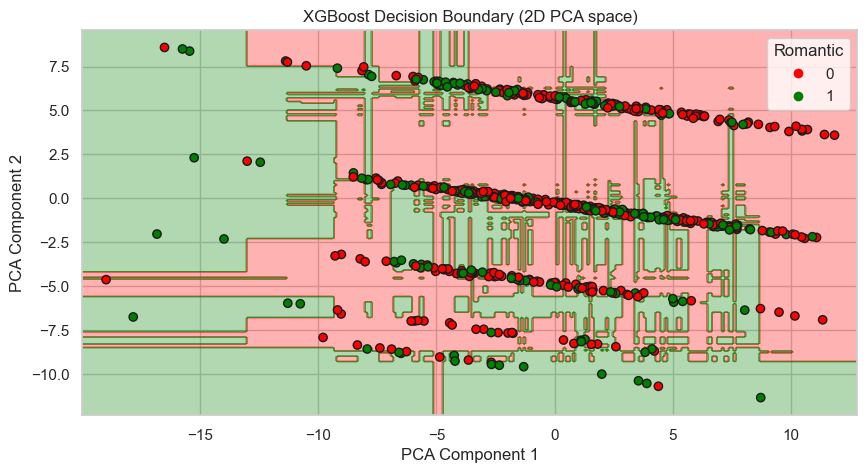

In [36]:
from matplotlib.colors import ListedColormap
X_vis = X_pca[:, :2]

xgb_model_2d = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_2d.fit(X_vis, y)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = xgb_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'green']))
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['red', 'green']))
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("XGBoost Decision Boundary (2D PCA space)")
plt.legend(*scatter.legend_elements(), title="Romantic")
plt.grid(True)
plt.show()

From XGBoost it is evident that the boundaries are very complex but still there are some misclassifications. Due to the complex boundaries, the model is very prone to overfitting thereby causing low accuracy in test data.

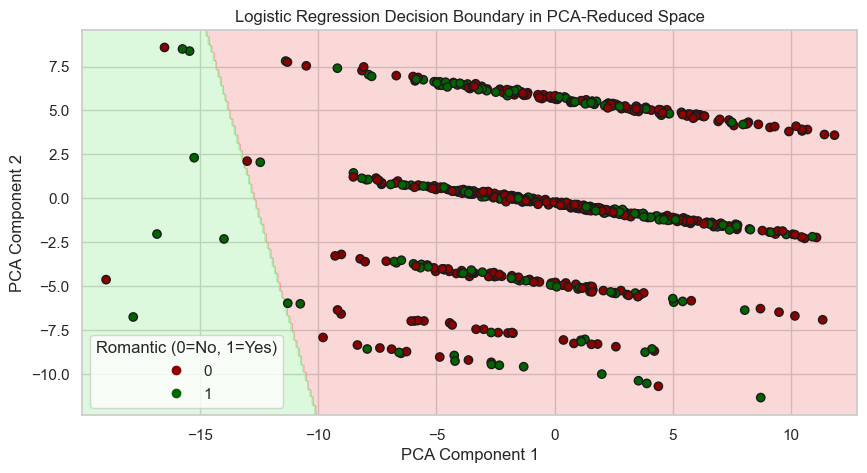

In [37]:
X_vis = X_pca[:, :2]

if y.dtype == 'O' or y.dtype.name == 'category':
    y_encoded = LabelEncoder().fit_transform(y)
else:
    y_encoded = y

logreg_model = LogisticRegression()
logreg_model.fit(X_vis, y_encoded)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = logreg_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['lightcoral', 'lightgreen']))
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_encoded, cmap=ListedColormap(['darkred', 'darkgreen']), edgecolor='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Logistic Regression Decision Boundary in PCA-Reduced Space")
plt.legend(*scatter.legend_elements(), title="Romantic (0=No, 1=Yes)")
plt.grid(True)
plt.show()

The Logistic Regression has tried to classify using simple straight line. But due to oversimplicity of model, there are very large number of misclassified points. Thus the accuracy is quite low. The model couldn't capture complex patterns.

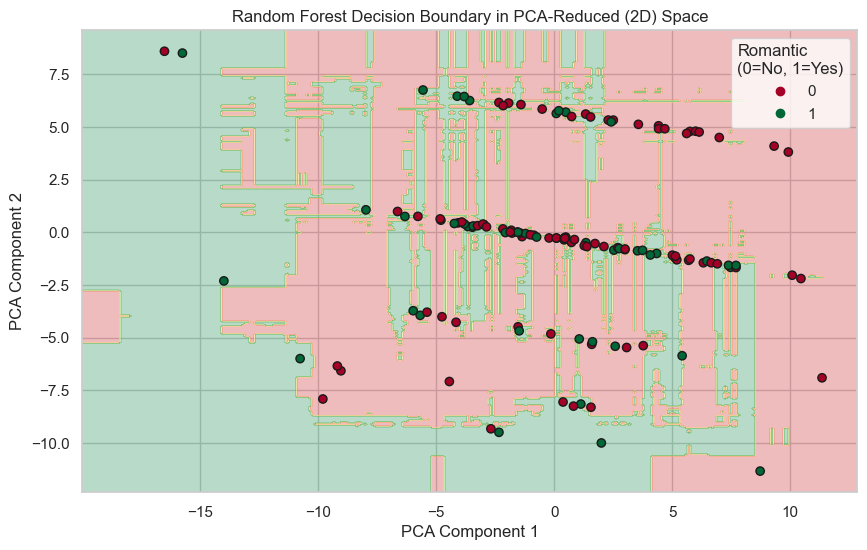

In [38]:
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X)

X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(X_vis, y, test_size=0.2, random_state=130, stratify=y)
rf_vis_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_vis_model.fit(X_vis_train, y_vis_train)
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = rf_vis_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlGn)
scatter = plt.scatter(X_vis_test[:, 0], X_vis_test[:, 1], c=y_vis_test, cmap=plt.cm.RdYlGn, edgecolor='k')

plt.title("Random Forest Decision Boundary in PCA-Reduced (2D) Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(*scatter.legend_elements(), title="Romantic\n(0=No, 1=Yes)")
plt.grid(True)

Decision Tree also had very complex boundaries. But still there are some misclassifications. Due to complexity of the boundaries the model is prone to overfitting but due to less complexity than XGBoost it gave better acuuracy in test data.

Using 519 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/50 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

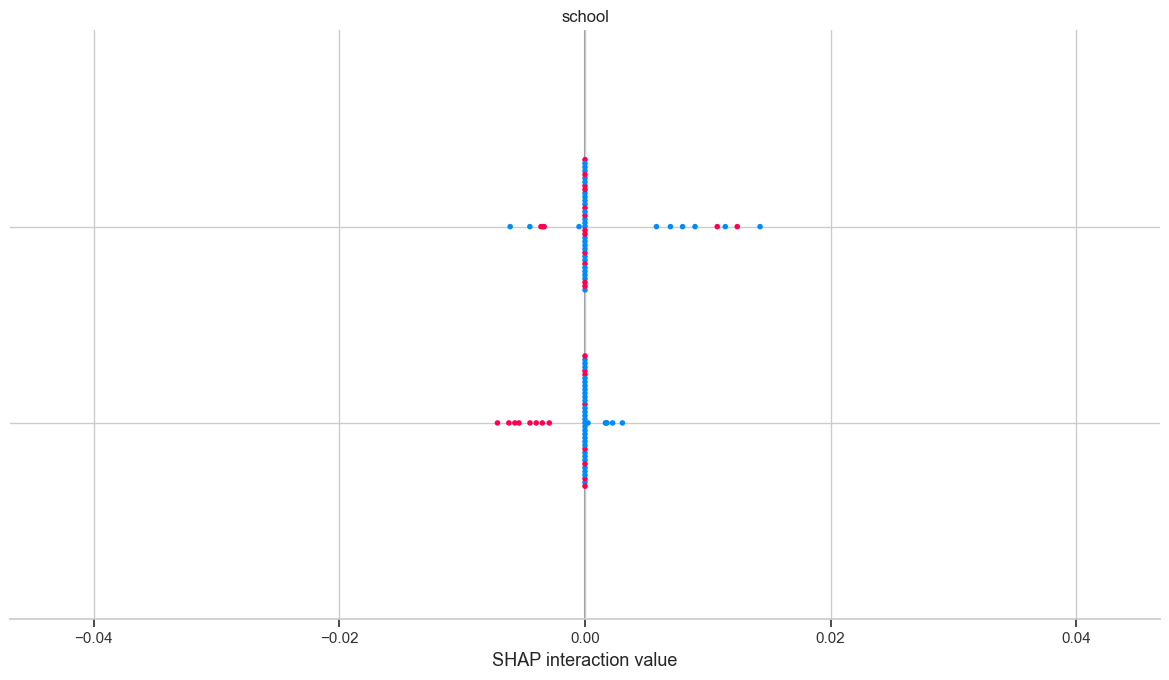

In [58]:
import shap
feature_names = df.drop(columns=['romantic']).columns
X_test_df = pd.DataFrame(X_test, columns=feature_names)
explainer = shap.KernelExplainer(svm_model.predict_proba, X_train)
shap_values = explainer.shap_values(X_test_df[:50], nsamples=100)
shap.summary_plot(shap_values, X_test_df[:50], feature_names=feature_names)

It seems that Adaboost has taken school to be one of the most important features.

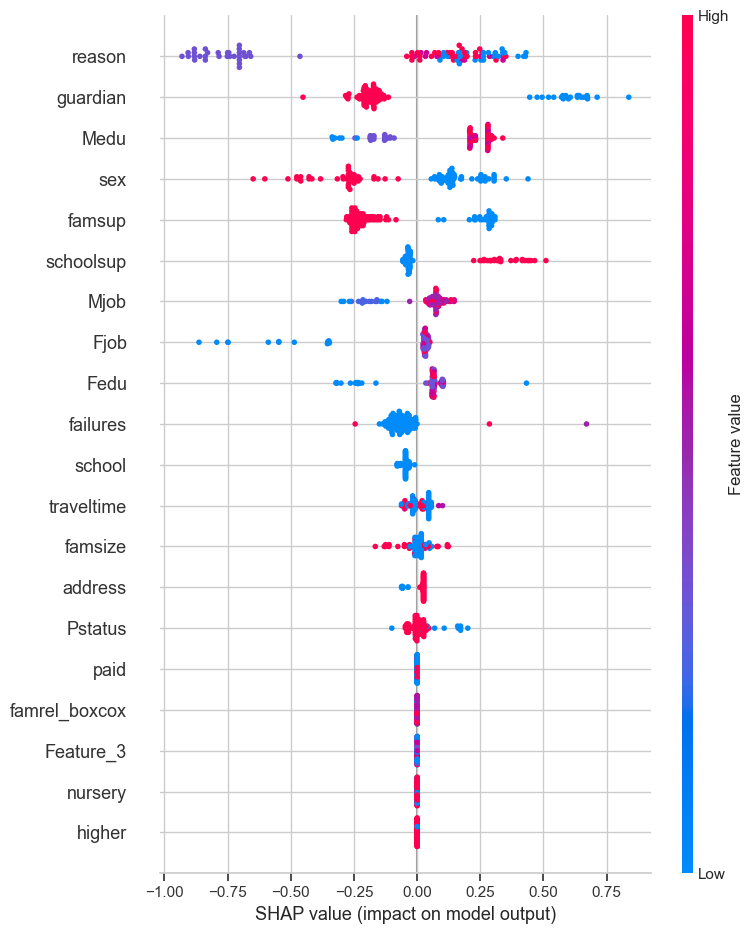

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [ ]:
explainer = shap.Explainer(xgb_model, X)
shap_values = explainer(X[:100])

shap.summary_plot(shap_values, X[:100])
plt.figure(figsize=(5, 5))

Based on XGBoost SHAP, Reason for school joining,Parents guidance based on Medu,Guardian,famsup are major factors determining relationship status.

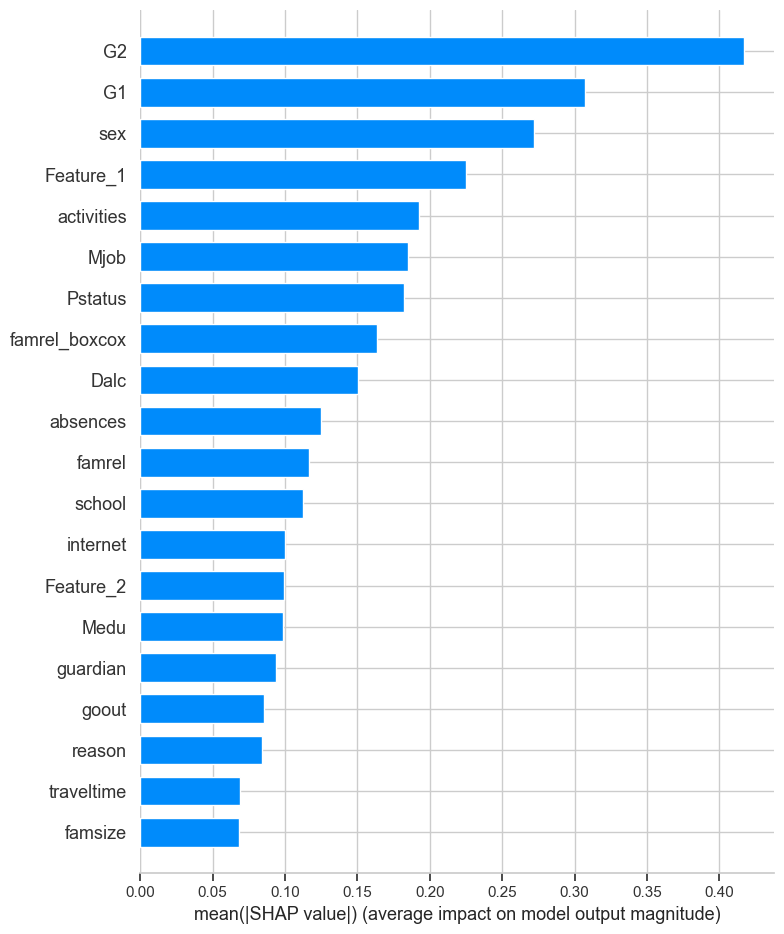

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

X_sample = X.sample(100, random_state=42)
explainer = shap.Explainer(model, X_sample)
shap_values = explainer(X_sample)
shap.summary_plot(shap_values, X_sample, plot_type="bar")
plt.figure(figsize=(5, 5))

Logistic regression seems to be giving importance to grades, indicating academic performance a prime feature for relationship status. Also social acceptance,activities,Parental guidance(Pstatus,Mjob) like exposure matters based on the trend to determine relationship status.